# Double Descent in Synthetic Linear Regression

In this notebook we study the **double descent phenomenon** in linear regression
using controlled synthetic data.

We fix the number of samples and systematically vary model capacity (number of features).
We evaluate:
- training error
- test error
- parameter norm
- numerical conditioning of the design matrix

This allows us to isolate the statistical and numerical mechanisms behind double descent.


In [287]:
import numpy as np
import matplotlib.pyplot as plt

from optimization_double_descent.data.synthetic import RegressionDataset
from optimization_double_descent.models.linear import LinearModel
from optimization_double_descent.objectives.least_squares import LeastSquares
from optimization_double_descent.objectives.ridge import Ridge
from optimization_double_descent.solvers.gradient_descent import GradientDescent
from optimization_double_descent.experiments.regression_double_descent import DoubleDescentExperiment
from optimization_double_descent.utils.plotting import (
    plot_train_test_error,
    plot_parameter_norm,
    plot_condition_number,
)

%load_ext autoreload
%autoreload 2

plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 11

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experimental setup

- Number of samples: fixed
- Model capacity: number of features `p`
- Objective: least squares
- Optimizer: gradient descent
- Noise: none (pure interpolation regime)

The interpolation threshold occurs when `p ≈ n_train`.


In [311]:
n_samples = 120
test_ratio = 0.3
n_train = int((1 - test_ratio) * n_samples)


p_grid = list(range(
    n_train - 30,
    n_train + 150,
    5
))


print("Training samples:", n_train)
print("Features:", p_grid)


Training samples: 84
Features: [54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229]


In [320]:
from optimization_double_descent.solvers.closed_form import ClosedFormSolver



experiment = DoubleDescentExperiment(
    dataset_cls=RegressionDataset,
    model_cls=LinearModel,
    objective = LeastSquares(),
    solver = GradientDescent(max_iter=1000000000),
    n_samples=n_samples,
    p_grid=p_grid,
    noise_std=0.8,
    test_ratio=test_ratio,
    seed=42,
    n_jobs=-1,
)

out = experiment.run()
results = out["results"]


Sweeping p: 100%|██████████| 36/36 [02:10<00:00,  3.63s/it]


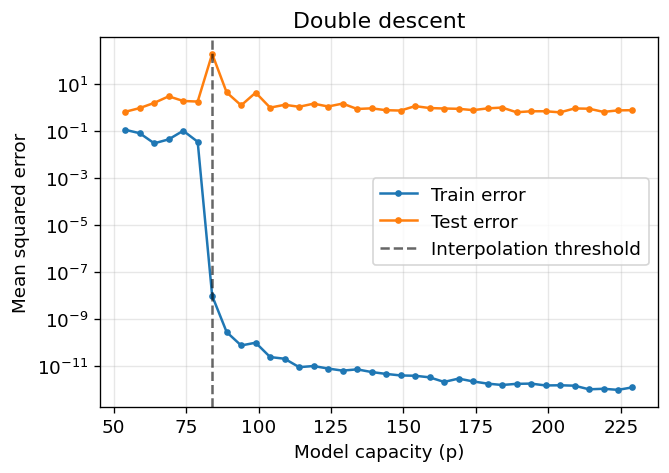

In [321]:
plot_train_test_error(results)
plt.axvline(n_train, color="k", linestyle="--", alpha=0.6, label="Interpolation threshold")
plt.legend()
plt.yscale("log")
plt.show()

# 800 ώρες έκανα να πετύχω αυτό το πλοτ, μη το πειραξεις!

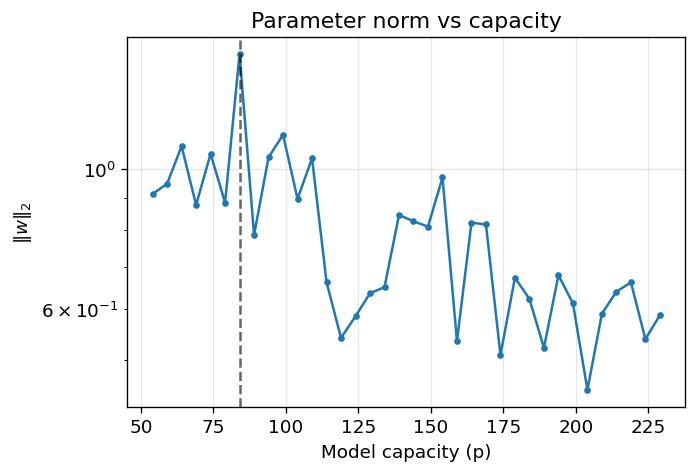

In [302]:
plot_parameter_norm(results)
plt.axvline(n_train, color="k", linestyle="--", alpha=0.6)
plt.show()


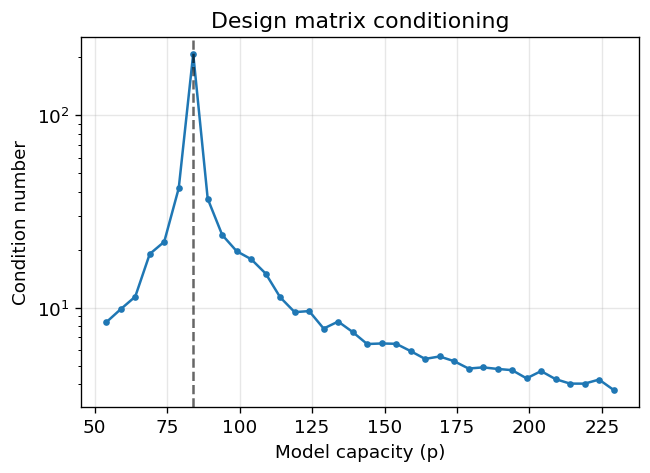

In [303]:
plot_condition_number(results)
plt.axvline(n_train, color="k", linestyle="--", alpha=0.6)
plt.show()
